In [81]:
import pandas as pd
import numpy as np
import datetime as dt
from statsmodels.tsa.seasonal import STL

In [2]:
## Fundamental Data Analysis
funda_data = pd.read_csv('Fundamental_data.csv')
funda_data.columns

Index(['gvkey', 'permno', 'adate', 'qdate', 'public_date', 'pcf', 'dpr', 'npm',
       'gpm', 'roa', 'roe', 'capital_ratio', 'de_ratio', 'cash_ratio',
       'curr_ratio', 'inv_turn', 'pay_turn', 'sale_nwc', 'rd_sale',
       'staff_sale', 'accrual', 'PEG_trailing', 'TICKER'],
      dtype='object')

In [3]:
funda_data = funda_data.drop(columns=['public_date',"pcf",'staff_sale','PEG_trailing','gvkey','permno','adate'])
funda_data = funda_data.drop_duplicates()

In [8]:
funda_data

,qdate,dpr,npm,gpm,roa,roe,capital_ratio,de_ratio,cash_ratio,curr_ratio,inv_turn,pay_turn,sale_nwc,rd_sale,accrual,TICKER
0,12/31/2009,0.284,0.277,0.842,0.332,0.427,0.065,0.916,1.231,1.849,11.904,2.777,2.626,0.146,-0.063,MSFT
3,03/31/2010,0.266,0.290,0.846,0.321,0.425,0.081,0.912,1.334,1.932,12.411,2.762,2.368,0.144,-0.064,MSFT
6,06/30/2010,0.242,0.300,0.842,0.325,0.436,0.097,0.865,1.407,2.129,13.573,2.697,2.116,0.139,-0.065,MSFT
9,09/30/2010,0.220,0.313,0.848,0.353,0.460,0.108,0.882,1.505,2.134,12.983,2.849,2.227,0.135,-0.065,MSFT
12,12/31/2010,0.231,0.308,0.833,0.338,0.445,0.130,0.895,1.576,2.233,13.311,3.077,2.105,0.134,-0.055,MSFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,09/30/2018,NaN,-0.102,0.280,0.021,-0.414,0.687,5.299,0.335,0.782,4.404,4.636,NaN,0.084,-0.112,TSLA
1153,12/31/2018,NaN,-0.045,0.276,0.056,-0.213,0.658,4.758,0.388,0.831,5.777,5.654,NaN,0.069,-0.105,TSLA
1156,03/31/2019,NaN,-0.043,0.270,0.063,-0.218,0.688,5.147,0.307,0.802,4.858,5.354,NaN,0.064,-0.099,TSLA
1159,06/30/2019,NaN,-0.026,0.261,0.082,-0.147,0.682,4.781,0.373,0.883,5.406,5.529,NaN,0.053,-0.119,TSLA


In there, we delete the unuseful columns named pulic_date, pcf, staff_sale, peg_trailing, gvkey, permno and drop the duplicates for each rows. We also delete the adate data out of the purpose to delete the unuseful information here. Finally, we gonna use the qdate to be the corresponding time to mark the ticker.

### Daily Indicators

In [15]:
for name in pd.unique(funda_data.TICKER).tolist():
    funda_stock = funda_data.loc[funda_data['TICKER'] == name,:]
    

MSFT
nan
FB
AAPL
BRK
JNJ
AMZN
NVDA
GOOG
GOOGL
V
TSLA


In [16]:
funda_data.loc[funda_data['TICKER'] == 'TSLA',:]

,qdate,dpr,npm,gpm,roa,roe,capital_ratio,de_ratio,cash_ratio,curr_ratio,inv_turn,pay_turn,sale_nwc,rd_sale,accrual,TICKER
1051,06/30/2010,NaN,-0.855,0.248,-0.552,NaN,0.402,2.682,0.964,1.572,3.144,15.549,3.208,0.336,-0.060,TSLA
1054,09/30/2010,NaN,-1.284,0.312,-0.768,NaN,0.287,1.344,1.427,2.091,2.257,15.549,1.426,0.641,-0.049,TSLA
1057,12/31/2010,NaN,-1.322,0.354,-0.527,NaN,0.259,0.865,2.024,2.757,2.204,4.421,0.777,0.797,-0.103,TSLA
1060,03/31/2011,NaN,-1.199,0.393,-0.600,-0.484,0.315,1.157,1.631,2.359,2.134,3.362,1.268,0.834,-0.103,TSLA
1063,06/30/2011,NaN,-1.111,0.406,-0.558,-0.811,0.280,0.910,2.046,2.759,2.186,3.158,0.977,0.904,-0.117,TSLA
1066,09/30/2011,NaN,-1.115,0.398,-0.460,-0.951,0.345,1.103,1.996,2.630,2.427,2.761,1.004,0.922,-0.205,TSLA
1069,12/31/2011,NaN,-1.246,0.384,-0.427,-2.271,0.548,2.184,1.588,1.949,2.640,3.070,1.125,1.023,-0.255,TSLA
1072,03/31/2012,NaN,-1.593,0.385,-0.446,-1.142,0.489,1.764,1.737,2.169,2.182,2.052,0.881,1.274,-0.270,TSLA
1075,06/30/2012,NaN,-2.223,0.375,-0.458,-1.341,0.628,3.020,1.328,1.684,1.739,1.719,1.037,1.680,-0.253,TSLA
1078,09/30/2012,NaN,-2.651,0.238,-0.493,-2.112,0.777,6.424,0.844,1.213,1.346,2.451,2.501,1.821,-0.206,TSLA


### Weekly Indicators

##  MarcoEconomic Anslysis


In [413]:
import datetime as dt
from datetime import datetime
macro = pd.read_csv("macro_data_1.csv")
macro = macro.loc[macro.datadate < '2020-02-01']
macro.loc[:,'datadate'] =[datetime.strptime(str,"%Y-%m-%d") for str in macro.loc[:,'datadate']]
#macro.to_csv("macro_data.csv",index=0)




### Macroeconomic Indicators
- REAL_GDP: annual data type 
- TREASURY_YIELD: short time(3-month: risk free rate)/ long time (30 years) 
- FEDERAL_FUNDS_RATE: Board of Governors of the Federal Reserve System (US), Federal Funds Effective Rate, retrieved from FRED, Federal Reserve Bank of St. Louis
- CPI: monthly data 
- INFLATION: annual data 
- UNEMPLOYMENT: The unemployment rate represents the number of unemployed as a percentage of the labor force.  
- NONFARM_PAYROLL: the monthly US All Employees, a measure of the number of U.S. workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed.

In [414]:
def moving_normal(series,win):
    new = (series - series.rolling(window=win).min())/(series.rolling(window=win).max() - series.rolling(window=win).min())
   
    return new

In [415]:
macro_columns = ['datadate','gdpr1','gdpr2','cpi','bond20yr','bond30yr','fedfunds','cpir','wpir','unemp','employ']
macro_use = macro[macro_columns]
stock_list = ['AAPL','MSFT','GOOG','AMZN','NVDA','BRK-B','TSLA','META','JNJ','V']
macro_use.iloc[:,1:]
#macro_use.iloc[:,2:3].apply(lambda x: moving_normal(x, win=4),axis=0).head(40)

,gdpr1,gdpr2,cpi,bond20yr,bond30yr,fedfunds,cpir,wpir,unemp,employ
0,15648.9910,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0
1,15648.9910,15456.059,2.1728,4.40,4.55,0.13,1.6366,6.8318,9.8,129698.0
2,15648.9910,15456.059,2.1735,4.55,4.72,0.09,1.6366,6.8318,9.9,129879.0
3,15648.9910,15605.628,2.1740,4.36,4.53,0.20,1.6366,6.8318,9.9,130110.0
4,15648.9910,15605.628,2.1729,4.05,4.22,0.19,1.6366,6.8318,9.6,130650.0
...,...,...,...,...,...,...,...,...,...,...
116,19036.0523,19130.932,2.5651,1.94,2.12,1.90,1.8129,-1.0440,3.5,151318.0
117,19036.0523,19215.691,2.5724,2.00,2.17,1.58,1.8129,-1.0440,3.6,151447.0
118,19036.0523,19215.691,2.5780,2.07,2.21,1.56,1.8129,-1.0440,3.6,151662.0
119,19036.0523,19215.691,2.5862,2.25,2.39,1.55,1.8129,-1.0440,3.6,151764.0


### Intrapolation

- **Seasonal decompose**:
 STL uses LOESS (locally estimated scatterplot smoothing) to extract smooths estimates of the three components:trend, seasonality, and noise.


In [416]:
macro_STL = {}
for col in macro_columns[1:]:

    macro_STL[col] = STL(macro_use.loc[:,col],period=12, robust=True).fit()
    if col == 'cpir':
        macro_STL[col] = STL(macro_use.loc[:,col],period=24, robust=True).fit()
    macro_use.loc[:,col+'_tr'] = macro_STL[col].trend+macro_STL[col].resid

macro_use

/var/folders/dy/lg_nw1516758wqn78l6dnqch0000gn/T/ipykernel_86735/560284882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro_use.loc[:,col+'_tr'] = macro_STL[col].trend+macro_STL[col].resid
/var/folders/dy/lg_nw1516758wqn78l6dnqch0000gn/T/ipykernel_86735/560284882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro_use.loc[:,col+'_tr'] = macro_STL[col].trend+macro_STL[col].resid
/var/folders/dy/lg_nw1516758wqn78l6dnqch0000gn/T/ipykernel_86735/560284882.py:7: SettingWithCopyWarning: 
A value is

,datadate,gdpr1,gdpr2,cpi,bond20yr,bond30yr,fedfunds,cpir,wpir,unemp,employ,gdpr1_tr,gdpr2_tr,cpi_tr,bond20yr_tr,bond30yr_tr,fedfunds_tr,cpir_tr,wpir_tr,unemp_tr,employ_tr
0,2010-01-31,15648.9910,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0,15548.490863,15521.688342,2.155575,3.899734,4.083008,0.133288,2.289647,5.801307,9.925161,129613.529599
1,2010-02-28,15648.9910,15456.059,2.1728,4.40,4.55,0.13,1.6366,6.8318,9.8,129698.0,15567.021053,15544.406806,2.162386,3.929108,4.084886,0.139987,2.273377,5.988866,9.919558,129719.851903
2,2010-03-31,15648.9910,15456.059,2.1735,4.55,4.72,0.09,1.6366,6.8318,9.9,129879.0,15585.341180,15566.913694,2.165775,3.898644,4.069344,0.145498,2.258935,6.176877,9.902234,129866.885466
3,2010-04-30,15648.9910,15605.628,2.1740,4.36,4.53,0.20,1.6366,6.8318,9.9,130110.0,15605.579806,15591.721516,2.167202,3.899826,4.064629,0.167023,2.241631,6.364817,9.771730,130011.690713
4,2010-05-31,15648.9910,15605.628,2.1729,4.05,4.22,0.19,1.6366,6.8318,9.6,130650.0,15625.402841,15613.199513,2.171726,3.875822,4.209144,0.168973,2.221802,6.550885,9.651148,130158.042486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2019-09-30,19036.0523,19130.932,2.5651,1.94,2.12,1.90,1.8129,-1.0440,3.5,151318.0,19127.308669,19128.035974,2.566397,2.184248,2.310609,1.981837,2.073234,-2.199971,3.610711,151307.291368
117,2019-10-31,19036.0523,19215.691,2.5724,2.00,2.17,1.58,1.8129,-1.0440,3.6,151447.0,19164.211194,19175.150344,2.571553,2.143377,2.309190,1.717590,2.083342,-2.597882,3.591829,151470.705122
118,2019-11-30,19036.0523,19215.691,2.5780,2.07,2.21,1.56,1.8129,-1.0440,3.6,151662.0,19199.302912,19216.176427,2.578129,2.024450,2.229872,2.025494,2.093017,-2.995318,3.578861,151688.516801
119,2019-12-31,19036.0523,19215.691,2.5862,2.25,2.39,1.55,1.8129,-1.0440,3.6,151764.0,19235.500908,19257.821592,2.583849,2.067088,2.221781,1.508525,2.101977,-3.385031,3.517959,151826.839195


- Fit Seasonalities with Fourier/Wavelets
- add back backfilled trends(and noise) for the interpolated daily Data

In [437]:
Date_df = pd.DataFrame(pd.date_range(start="2010-01-31",end="2020-01-31",freq='W').to_pydatetime(),columns=['Date'])
Date_df['Date'] = [d.to_pydatetime() for d in Date_df.loc[:,'Date']]

macro_df = pd.merge(Date_df,macro_use, left_on='Date', right_on='datadate',how='outer')
macro_df.loc[macro_df.Date.isna(),'Date'] = macro_df.loc[macro_df.Date.isna(),'datadate']
macro_df = macro_df.sort_values(by='Date').drop('datadate',axis=1)
macro_df

,Date,gdpr1,gdpr2,cpi,bond20yr,bond30yr,fedfunds,cpir,wpir,unemp,employ,gdpr1_tr,gdpr2_tr,cpi_tr,bond20yr_tr,bond30yr_tr,fedfunds_tr,cpir_tr,wpir_tr,unemp_tr,employ_tr
0,2010-01-31,15648.9910,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0,15548.490863,15521.688342,2.155575,3.899734,4.083008,0.133288,2.289647,5.801307,9.925161,129613.529599
1,2010-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-02-28,15648.9910,15456.059,2.1728,4.40,4.55,0.13,1.6366,6.8318,9.8,129698.0,15567.021053,15544.406806,2.162386,3.929108,4.084886,0.139987,2.273377,5.988866,9.919558,129719.851903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [418]:
import matplotlib.pyplot as plt

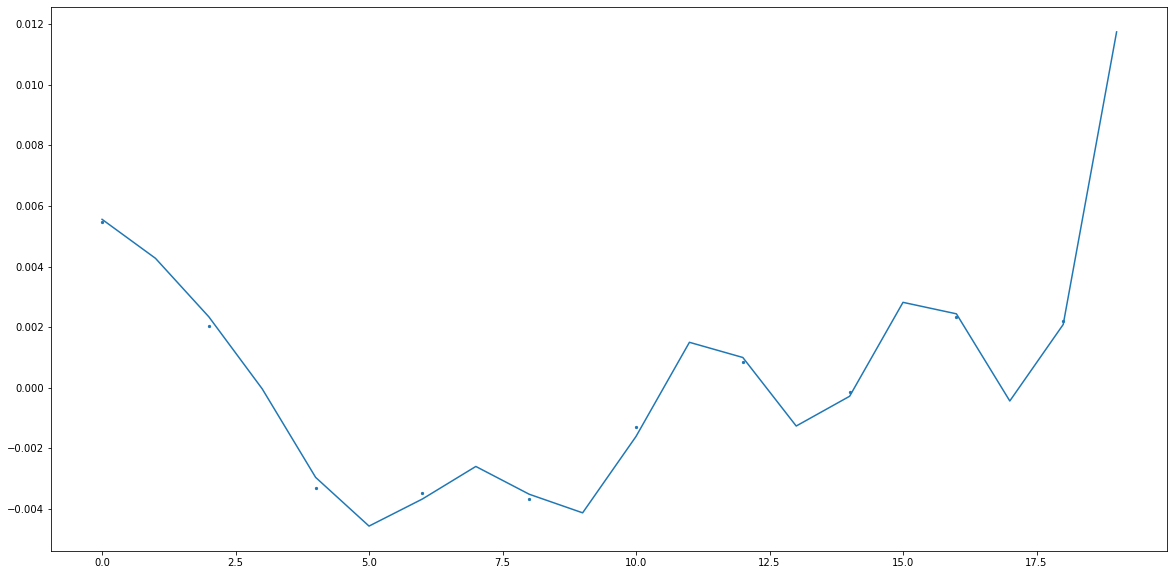

In [285]:
macro_ind = 'cpi'
gdpr1_seasonal = macro_STL[macro_ind].seasonal
sp = np.fft.rfft(gdpr1_seasonal)
freq = np.fft.rfftfreq(12)
plt.figure(figsize=(20,10))
plt.plot((np.fft.irfft(sp,n=240,norm='ortho')*np.sqrt(240)/121)[-20:])
plt.scatter(range(0,20,2), gdpr1_seasonal[1:][-10:],s=5)


In [ ]:
macro_fft = macro_df.loc[:,['Date','year']].copy()

for macro_ind in macro_columns[1:]:
    gdpr1_seasonal = macro_STL[macro_ind].seasonal
    fft_gpd_season = []
  
    sp = np.fft.rfft(gdpr1_seasonal[:48])
    #macro_df.loc[:,macro_ind+'_tr'] = macro_df.loc[:,macro_ind+'_tr'].bfill()
    
    this_macro_df= macro_df.loc[(macro_df.year<2014)]
    fft_gpd_season = np.fft.irfft(sp,n=len(this_macro_df),norm='backward')*len(this_macro_df)/48

    macro_fft.loc[macro_fft.year<2014,macro_ind] = fft_gpd_season+this_macro_df.loc[:,macro_ind+'_tr']

    #
    sp = np.fft.rfft(gdpr1_seasonal[36: -37])
    #macro_df.loc[:,macro_ind+'_tr'] = macro_df.loc[:,macro_ind+'_tr'].bfill()
    
    this_macro_df= macro_df.loc[(macro_df.year<2017)&(macro_df.Date>='2013-01-31')]
    fft_gpd_season = np.fft.irfft(sp,n=len(this_macro_df),norm='ortho')*np.sqrt(len(this_macro_df))/48
    macro_fft.loc[(macro_df.year<2017)&(macro_df.Date>='2013-01-31'),macro_ind] = fft_gpd_season+this_macro_df.loc[:,macro_ind+'_tr']

    
    sp = np.fft.rfft(gdpr1_seasonal[-48: -13])
    #macro_df.loc[:,macro_ind+'_tr'] = macro_df.loc[:,macro_ind+'_tr'].bfill()
    
    this_macro_df= macro_df.loc[(macro_df.year<2020)&(macro_df.Date>='2016-01-31')]
    fft_gpd_season = np.fft.irfft(sp,n=len(this_macro_df),norm='ortho')*np.sqrt(len(this_macro_df))/48
    macro_fft.loc[(macro_df.year<2020)&(macro_df.Date>='2016-01-31'),macro_ind] = fft_gpd_season+this_macro_df.loc[:,macro_ind+'_tr']


    sp = np.fft.rfft(gdpr1_seasonal[-25:])
    #macro_df.loc[:,macro_ind+'_tr'] = macro_df.loc[:,macro_ind+'_tr'].bfill()
    
    this_macro_df= macro_df.loc[(macro_df.Date>='2018-01-31')]
    fft_gpd_season = np.fft.irfft(sp,n=len(this_macro_df),norm='ortho')*np.sqrt(len(this_macro_df))/25
    macro_fft.loc[macro_fft.Date>='2018-01-31',macro_ind] = fft_gpd_season+this_macro_df.loc[:,macro_ind+'_tr']

plt.figure(figsize=(20,10))
plt.plot(macro_fft.loc[macro_fft.Date>='2018-01-31','Date'], fft_gpd_season)
plt.scatter(macro_use.loc[macro_use.datadate>='2018-01-31','datadate'], gdpr1_seasonal[-25:])




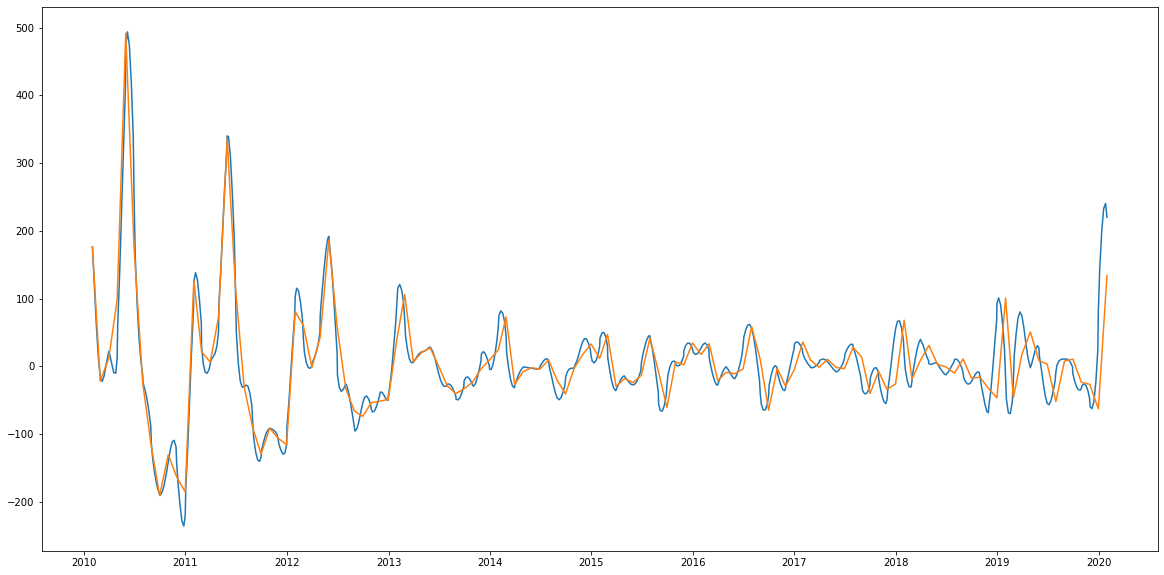

In [438]:
macro_fft = macro_df.loc[:,['Date']].copy()

for macro_ind in macro_columns[1:]:
    gdpr1_seasonal = macro_STL[macro_ind].seasonal
    fft_gpd_season = []
  
    sp = np.fft.rfft(gdpr1_seasonal[:])
    macro_df.loc[:,macro_ind+'_tr'] = macro_df.loc[:,macro_ind+'_tr'].bfill()
    
   
    fft_gpd_season = np.fft.irfft(sp,n=len(macro_df),norm='backward')*len(macro_df)/121
    macro_fft.loc[:,macro_ind] = fft_gpd_season+macro_df.loc[:,macro_ind+'_tr']

   
plt.figure(figsize=(20,10))
plt.plot(macro_fft.loc[:,'Date'], fft_gpd_season)
plt.plot(macro_use.loc[macro_use.datadate>='2010-01-01','datadate'], gdpr1_seasonal)
macro_fft.to_csv('macro_fft.csv',index=0)


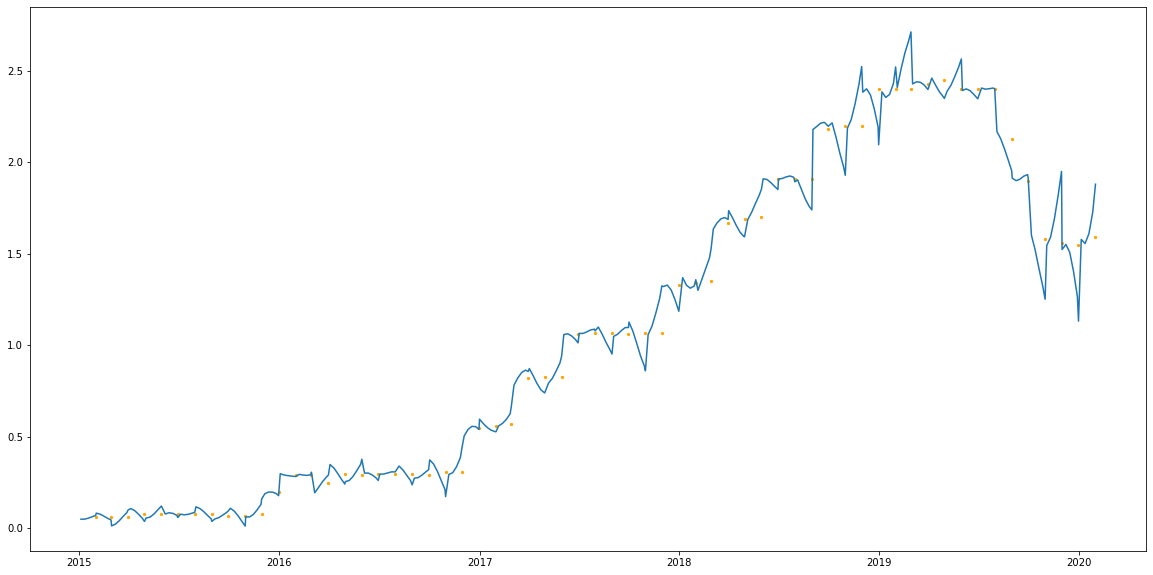

In [452]:
plt.figure(figsize=(20,10))
plt.plot(macro_fft.loc[macro_fft.Date>'2015-01-01','Date'], macro_fft.loc[macro_fft.Date>'2015-01-01','fedfunds'])
plt.scatter(macro_use.loc[macro_use.datadate>'2015-01-01','datadate'], macro_use.loc[macro_use.datadate>'2015-01-01','fedfunds'],c='orange',s=5)

### Merge with Stockprice

- Daily/Weekly merge with interpolated data
- monthly merge with original data


In [440]:

macro_list = ['gdpr1','gdpr2','cpi','bond20yr','bond30yr','fedfunds','cpir','wpir','unemp','employ']



In [448]:
import os
import sys

if not os.path.isdir('Macro'):
    os.mkdir('Macro')
if not os.path.isdir('Macro/Daily'):
    os.mkdir('Macro/Daily')
if not os.path.isdir('Macro/Weekly'):
    os.mkdir('Macro/Weekly')

if not os.path.isdir('Macro/Monthly'):
    os.mkdir('Macro/Monthly')


macro_bfill_daily = {}


for stock in stock_list:
    
    stock_df = pd.read_csv("../encode_price/Daily/"+stock+".csv")
    stock_df.loc[:,'Date'] =[datetime.strptime(str,"%Y-%m-%d") for str in stock_df.loc[:,'Date']]
    stock_df = pd.merge(stock_df[['Date','adjusted_close']],macro_fft, on='Date',how='outer').sort_values(by='Date').reset_index(drop=True)
    #stock_df.loc[stock_df.Date.isna(),'Date'] = stock_df.loc[stock_df.Date.isna(),'datadate']
    #stock_df.rename(columns={"5. adjusted close":"adjusted_close"},inplace=True)
    stock_df.loc[:,macro_list] = stock_df.loc[:,macro_list].bfill()
    
    stock_df.dropna(subset=['adjusted_close'],inplace=True)
    stock_df.drop('adjusted_close',axis=1,inplace=True)
    macro_bfill_daily[stock] = stock_df
    stock_df.to_csv("Macro/Daily/"+stock+".csv",index=0)




In [447]:
stock_df = pd.read_csv("../encode_price/Daily/"+"AAPL"+".csv")
stock_df.loc[:,'Date'] =[datetime.strptime(str,"%Y-%m-%d") for str in stock_df.loc[:,'Date']]
stock_df = pd.merge(stock_df[['Date','adjusted_close']],macro_fft, on='Date',how='outer').sort_values(by='Date').reset_index(drop=True)
stock_df.loc[:,macro_list] = stock_df.loc[:,macro_list].bfill()

#stock_df.loc[stock_df.Date.isna(),'Date'] = stock_df.loc[stock_df.Date.isna(),'datadate']
#stock_df = stock_df.sort_values(by='Date')
##stock_df.rename(columns={"5. adjusted close":"adjusted_close"},inplace=True)
#stock_df.loc[:,macro_list] = stock_df.loc[:,macro_list].bfill()
#macro_bfill_daily[stock] = stock_df
stock_df.dropna(subset=['adjusted_close'],inplace=True)
stock_df.drop('adjusted_close',axis=1,inplace=True)

stock_df.to_csv("Macro/Daily/"+stock+".csv",index=0)

,Date,gdpr1,gdpr2,cpi,bond20yr,bond30yr,fedfunds,cpir,wpir,unemp,employ
3038,2019-12-13,19117.099138,19229.585953,2.584543,2.133443,2.295609,1.507716,1.793940,-2.961034,3.638375,151775.172498
3040,2019-12-16,19201.916649,19242.485866,2.583526,2.053242,2.223088,1.402933,1.767061,-4.596908,3.647408,151804.005147
3041,2019-12-17,19201.916649,19242.485866,2.583526,2.053242,2.223088,1.402933,1.767061,-4.596908,3.647408,151804.005147
3042,2019-12-18,19201.916649,19242.485866,2.583526,2.053242,2.223088,1.402933,1.767061,-4.596908,3.647408,151804.005147
3043,2019-12-19,19201.916649,19242.485866,2.583526,2.053242,2.223088,1.402933,1.767061,-4.596908,3.647408,151804.005147
3044,2019-12-20,19201.916649,19242.485866,2.583526,2.053242,2.223088,1.402933,1.767061,-4.596908,3.647408,151804.005147
3046,2019-12-23,19294.865861,19253.745763,2.583298,2.005141,2.172960,1.265301,1.728888,-6.071220,3.634103,151850.487089
3047,2019-12-24,19294.865861,19253.745763,2.583298,2.005141,2.172960,1.265301,1.728888,-6.071220,3.634103,151850.487089
3048,2019-12-26,19294.865861,19253.745763,2.583298,2.005141,2.172960,1.265301,1.728888,-6.071220,3.634103,151850.487089
3049,2019-12-27,19294.865861,19253.745763,2.583298,2.005141,2.172960,1.265301,1.728888,-6.071220,3.634103,151850.487089


In [453]:
macro_bfill_daily['AAPL'].head(40)

,Date,gdpr1,gdpr2,cpi,bond20yr,bond30yr,fedfunds,cpir,wpir,unemp,employ
0,2010-01-04,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
1,2010-01-05,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
2,2010-01-06,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
3,2010-01-07,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
4,2010-01-08,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
5,2010-01-11,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
6,2010-01-12,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
7,2010-01-13,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
8,2010-01-14,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
9,2010-01-15,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000


In [450]:
macro_bfill_weekly = {}

for stock in stock_list:
    stock_df = pd.read_csv("../encode_price/Weekly/"+stock+".csv")
    stock_df.loc[:,'Date'] =[datetime.strptime(str,"%Y-%m-%d") for str in stock_df.loc[:,'Date']]
    stock_df = pd.merge(stock_df[['Date','adjusted_close']],macro_fft, on='Date',how='outer')
    #stock_df.loc[stock_df.Date.isna(),'Date'] = stock_df.loc[stock_df.Date.isna(),'datadate']
    stock_df = stock_df.sort_values(by='Date')
    stock_df.loc[:,macro_list] = stock_df.loc[:,macro_list].bfill()
    stock_df.dropna(subset=['adjusted_close'],inplace=True)
    
    stock_df.drop('adjusted_close',axis=1,inplace=True)
    macro_bfill_weekly[stock] = stock_df
    stock_df.to_csv("Macro/Weekly/"+stock+".csv",index=0)




In [451]:
macro_bfill_weekly['AAPL'].head(40)

,Date,gdpr1,gdpr2,cpi,bond20yr,bond30yr,fedfunds,cpir,wpir,unemp,employ
525,2010-01-08,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
524,2010-01-15,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
523,2010-01-22,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
522,2010-01-29,15648.991000,15456.059000,2.174900,4.380000,4.510000,0.120000,1.636600,6.831800,9.800000,129790.000000
521,2010-02-05,15622.033210,15469.231583,2.182108,4.436626,4.552084,0.242274,1.614896,7.810799,9.800653,129839.350489
520,2010-02-12,15596.979226,15463.981818,2.181011,4.434270,4.564226,0.299322,1.616572,8.112744,9.808626,129781.514714
519,2010-02-19,15595.733979,15461.626325,2.178785,4.416648,4.558724,0.292221,1.622254,7.963622,9.812284,129734.447670
518,2010-02-26,15614.444566,15459.956689,2.175992,4.400206,4.549302,0.232821,1.629228,7.504376,9.809193,129705.847619
517,2010-03-05,15662.025221,15479.357836,2.176623,4.367799,4.533027,0.151258,1.621185,7.116977,9.784106,129844.618071
516,2010-03-12,15690.109000,15473.664783,2.174405,4.386702,4.548761,0.065867,1.626124,6.613881,9.777529,129852.623684


In [435]:
macro_bfill_monthly = {}

for stock in stock_list:
    stock_df = pd.read_csv("../encode_price/Monthly/"+stock+".csv")
    stock_df.loc[:,'Date'] =[datetime.strptime(str,"%Y-%m-%d") for str in stock_df.loc[:,'Date']]
    stock_df = pd.merge(stock_df[['Date','adjusted_close']],macro_use.iloc[:,:11], left_on='Date', right_on='datadate',how='outer')
    stock_df.loc[stock_df.Date.isna(),'Date'] = stock_df.loc[stock_df.Date.isna(),'datadate']
    stock_df = stock_df.sort_values(by='Date').drop('datadate',axis=1)
    #stock_df.rename(columns={"5. adjusted close":"adjusted_close"},inplace=True)
    stock_df.loc[:,macro_list] = stock_df.loc[:,macro_list].bfill()
    macro_bfill_monthly[stock] = stock_df
    stock_df.dropna(subset=['adjusted_close'],inplace=True)
    stock_df.drop('adjusted_close',axis=1,inplace=True)
    stock_df.to_csv("Macro/Monthly/"+stock+".csv",index=0)



In [434]:
macro_bfill_monthly['AAPL'].head(40)

,Date,gdpr1,gdpr2,cpi,bond20yr,bond30yr,fedfunds,cpir,wpir,unemp,employ
0,2007-01-31,15648.991,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0
1,2007-02-28,15648.991,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0
2,2007-03-30,15648.991,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0
3,2007-04-30,15648.991,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0
4,2007-05-31,15648.991,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0
5,2007-06-29,15648.991,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0
6,2007-07-31,15648.991,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0
7,2007-08-31,15648.991,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0
8,2007-09-28,15648.991,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0
9,2007-10-31,15648.991,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0


### Technical Alpha Factor Generation
- SMA: simple moving average of closing price
- EMA: exponential moving average of closing price
- VWAP: the volume weighted average for intra
- MACD: the movign average convergence/divergence values
- STOCH: the stochastic oscillator values where here the close is in relation to the recent trading range
- RSI: the relative strength index (RSI) values, where calculates a ratio of the recent upward price movements to the absolute price movement
- MFI: the money flow index values - look for divergence with price to signal reversals. 
- SAR: returns the parabolic SAR values
- AD: The Accumulation/Distribution Line is similar to the On Balance Volume (OBV), which sums the volume times +1/-1 based on whether the close is higher than the previous close.The Accumulation/Distribution Line is interpreted by looking for a divergence in the direction of the indicator relative to price. If the Accumulation/Distribution Line is trending upward it indicates that the price may follow. Also, if the Accumulation/Distribution Line becomes flat while the price is still rising (or falling) then it signals an impending flattening of the price.

In [8]:
from tech_indicators import *
import pandas as pd
if not os.path.isdir('Tech'):
    os.mkdir('Tech')
if not os.path.isdir('Tech/Daily'):
    os.mkdir('Tech/Daily')
if not os.path.isdir('Tech/Weekly'):
    os.mkdir('Tech/Weekly')

if not os.path.isdir('Tech/Monthly'):
    os.mkdir('Tech/Monthly')

stock_list = ['AAPL','MSFT','GOOG','AMZN','NVDA','BRK-B','TSLA','META','JNJ','V']

In [ ]:
AAPL = pd.read_csv("../stock_price/Daily/AAPL.csv")
df = AAPL.copy()
sma = calculate_sma(df, window=14)
ema = calculate_ema(df, window=14)
k, d = calculate_stoch(df)
rsi = calculate_rsi(df)
mfi = calculate_mfi(df)
sar = calculate_sar(df)
ad = calc_AD(df)

tech_Daily = pd.DataFrame({"Date":df.loc[:,"Date"],
              "SMA":sma,
              "EMA":ema,
              "STOCH_k":k,
              "STOCK_d":d,
              "RSI":rsi,
              "MFI":mfi,
              "SAR":sar,
              "AD":ad
              })

In [18]:
for stock in stock_list:
    stock_df = pd.read_csv("../stock_price/Daily/"+stock+".csv")
    df = stock_df.copy().sort_values(by="Date")
    sma = calculate_sma(df, window=14)
    ema = calculate_ema(df, window=14)
    k, d = calculate_stoch(df)
    rsi = calculate_rsi(df)
    mfi = calculate_mfi(df)
    sar = calculate_sar(df)
    ad = calc_AD(df)

    tech_Daily = pd.DataFrame({"Date":df.loc[:,"Date"],
              "SMA":sma,
              "EMA":ema,
              "STOCH_k":k,
              "STOCK_d":d,
              "RSI":rsi,
              "MFI":mfi,
              "SAR":sar,
              "AD":ad
              })
    tech_Daily.to_csv("Tech/Daily/"+stock+".csv",index=0)

In [19]:
for stock in stock_list:
    stock_df = pd.read_csv("../stock_price/Weekly/"+stock+".csv")
    df = stock_df.copy().sort_values(by="Date")
    sma = calculate_sma(df, window=5)
    ema = calculate_ema(df, window=5)
    k, d = calculate_stoch(df,k_window=5)
    rsi = calculate_rsi(df,period=5)
    mfi = calculate_mfi(df,period=5)
    sar = calculate_sar(df,lookback=5)
    ad = calc_AD(df)

    tech_Weekly = pd.DataFrame({"Date":df.loc[:,"Date"],
              "SMA":sma,
              "EMA":ema,
              "STOCH_k":k,
              "STOCK_d":d,
              "RSI":rsi,
              "MFI":mfi,
              "SAR":sar,
              "AD":ad
              })
    
    tech_Weekly.to_csv("Tech/Weekly/"+stock+".csv",index=0)

In [21]:
for stock in stock_list:
    stock_df = pd.read_csv("../stock_price/Monthly/"+stock+".csv")
    df = stock_df.copy().sort_values(by="Date")
    sma = calculate_sma(df, window=5)
    ema = calculate_ema(df, window=5)
    k, d = calculate_stoch(df,k_window=5)
    rsi = calculate_rsi(df,period=5)
    mfi = calculate_mfi(df,period=5)
    sar = calculate_sar(df,lookback=5)
    ad = calc_AD(df)

    tech_Monthly = pd.DataFrame({"Date":df.loc[:,"Date"],
              "SMA":sma,
              "EMA":ema,
              "STOCH_k":k,
              "STOCK_d":d,
              "RSI":rsi,
              "MFI":mfi,
              "SAR":sar,
              "AD":ad
              })
    
    tech_Monthly.to_csv("Tech/Monthly/"+stock+".csv",index=0)

### Merge Indicators

- Higham

In [48]:
## higham
def P_s(a, wh):
    # helper function for higham, the second projection
 
    a = wh.dot(a).dot(wh)
    vals, vecs = np.linalg.eigh(a)
    vals[np.where(vals < 0)] = 0
    a = vecs.dot(np.diag(vals)).dot(vecs.T)

    wh_inv = np.diag(1 / np.diagonal(wh))

    a = wh_inv.dot(a).dot(wh_inv)
    return a


def P_u(a):
    # helper function for higham, the first projection
    np.fill_diagonal(a, 1)
    return a


def higham_psd(a, tol=None, max_iter=100, weights=None):
    # higham nearest psd
    if tol is None:
        tol = np.spacing(1) * len(a)
    if weights is None:
        weights = np.ones(len(a))
    w_h = np.diag(np.sqrt(weights))
    Y = np.copy(a)
    ds = np.zeros(np.shape(a))
    for i in range(0, max_iter):
        norm_Y_pre = fro_norm(Y)
        R = Y - ds
        X = P_s(R, w_h)

        ds = X - R
        Y = P_u(X)
        norm_Y = fro_norm(Y)

        if -1 * tol < norm_Y - norm_Y_pre < tol:
            break
    return pd.DataFrame(Y)

def fro_norm(a):
    return np.sum(np.square(a))


In [74]:
def moving_normal(series,win):
    new = (series - series.rolling(window=win).mean())/series.rolling(window=win).std()
    return new

In [80]:
AAPL = pd.read_csv("Merged/Daily/AAPL.csv")
AAPL = AAPL.loc[(AAPL.Date<'2019-10-01')&(AAPL.Date>"2010-01-21")]
#AAPL.iloc[:,1:] = AAPL.iloc[:,1:].apply(lambda x:moving_normal(series=x,win=10),axis=0)
corr = AAPL.drop("Date",axis=1).corr()
higham = higham_psd(AAPL.drop("Date",axis=1).corr())


In [77]:
print(fro_norm(higham.values - corr.values))

1.6888769411126296e-28
